1. Write a Python function to calculate the revenue generated per city from a dataset of hotel bookings stored in a CSV file. Each row contains columns: city, room_price, and number_of_nights.
2. Write a Python program to find the city with the highest growth in bookings month-over-month using a dataset with columns: city, booking_date, and number_of_bookings.
3. Create a Python script to calculate the percentage of cancellations for each property from a dataset containing columns: property_id, booking_status (confirmed/cancelled).
4. Write a Python function to identify properties with unusually high cancellation rates using the Z-score method on the cancellation percentage.
5. Write a Python program to plot a bar chart showing the top 5 cities by total revenue using Matplotlib or Seaborn.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
cancellations_df = pd.read_csv("cancellations.csv")
booking_df = pd.read_csv("booking_growth.csv")
hotel = pd.read_csv("hotel_bookings.csv")

In [74]:
hotel

,city,room_price,number_of_nights
0,Houston,147,3
1,Miami,247,7
2,Chicago,444,2
3,Miami,289,2
4,Miami,193,7
...,...,...,...
195,Chicago,69,3
196,Chicago,370,9
197,New York,313,1
198,Miami,449,9


In [75]:
booking_df

,city,booking_date,number_of_bookings
0,New York,2024-02-24,17
1,Miami,2024-12-24,44
2,Los Angeles,2024-05-10,28
3,Houston,2024-10-14,29
4,Miami,2024-09-22,21
...,...,...,...
495,Los Angeles,2024-06-23,10
496,Chicago,2024-03-24,39
497,Houston,2024-01-22,13
498,New York,2024-01-27,31


In [76]:
cancellations_df

,property_id,booking_status
0,P17,confirmed
1,P10,confirmed
2,P10,cancelled
3,P4,confirmed
4,P20,cancelled
...,...,...
295,P17,confirmed
296,P9,cancelled
297,P9,cancelled
298,P1,cancelled


#Question 1

In [77]:
#Revenue as per city
for c in hotel:
  hotel['revenue'] = hotel['room_price'] * hotel['number_of_nights']
revenue_city = hotel.groupby('city')['revenue'].sum().reset_index()

In [78]:
revenue_city

,city,revenue
0,Chicago,51467
1,Houston,62625
2,Los Angeles,43513
3,Miami,53663
4,New York,56076


#Question 2

In [79]:
booking_df['booking_date'] = pd.to_datetime(booking_df['booking_date'])

In [80]:
booking_df['month'] =  booking_df['booking_date'].dt.to_period('M')
bookings_month = booking_df.groupby(['city','month'])['number_of_bookings'].sum().reset_index()
bookings_month

,city,month,number_of_bookings
0,Chicago,2024-01,198
1,Chicago,2024-02,309
2,Chicago,2024-03,244
3,Chicago,2024-04,195
4,Chicago,2024-05,115
5,Chicago,2024-06,180
6,Chicago,2024-07,173
7,Chicago,2024-08,317
8,Chicago,2024-09,144
9,Chicago,2024-10,222


In [81]:
bookings_month = bookings_month.sort_values(['city','month'])
bookings_month["MoM_growth"] = bookings_month.groupby('city')['number_of_bookings'].pct_change()
max_growth_monthly = bookings_month.loc[bookings_month['MoM_growth'].idxmax()]
max_growth_monthly

,29
city,Los Angeles
month,2024-06
number_of_bookings,315
MoM_growth,2.28125


#Question 3

In [94]:
total_count= cancellations_df.groupby('property_id')['booking_status'].count()
print(total_count)

property_id
P1     14
P10    19
P11     7
P12    12
P13    16
P14    13
P15    11
P16    12
P17    14
P18    17
P19     9
P2     20
P20    18
P3     21
P4     20
P5     15
P6     15
P7     17
P8     13
P9     17
Name: booking_status, dtype: int64


In [97]:
cancelled = cancellations_df[cancellations_df['booking_status'] == 'cancelled'].groupby('property_id')['booking_status'].count()
print(cancelled)

property_id
P1     8
P10    5
P11    3
P12    4
P13    5
P14    3
P15    2
P16    2
P17    4
P18    4
P19    4
P2     4
P20    6
P3     5
P4     6
P5     5
P6     5
P7     5
P8     4
P9     7
Name: booking_status, dtype: int64


In [98]:
cancellation_percentage = ((cancelled *100)/total_count).fillna(0).reset_index(name="cancellation_percent")
cancellation_percentage

,property_id,cancellation_percent
0,P1,57.142857
1,P10,26.315789
2,P11,42.857143
3,P12,33.333333
4,P13,31.250000
5,P14,23.076923
6,P15,18.181818
7,P16,16.666667
8,P17,28.571429
9,P18,23.529412


#Question 5

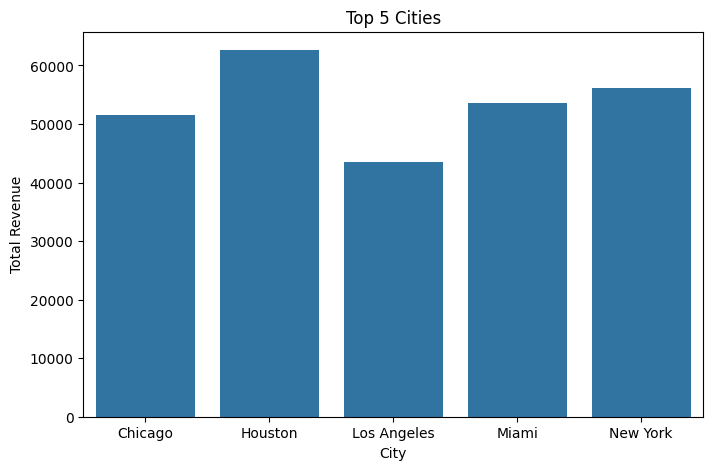

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=revenue_city, x="city", y="revenue")
plt.title("Top 5 Cities")
plt.ylabel("Total Revenue")
plt.xlabel("City")
plt.show()